### First assignment:

Wróćmy do hiperkuli wpisanej w hipersześcian z pierwszego zadania. Pokolorujmy  na czubkach narożników sześcianu na czerwono, punkty na krawędziach na żółto (mogą wymagać dodatkowej generacji, bo w losowym rozkładzie się raczej nie pojawią), punkty w jego wnętrzu (ale nie we wnętrzu kuli) na niebiesko, a punkty z kuli na zielono. Schemat kolorów przykładowy, każdy inny który pozwoli odróżnić elementy będzie ok. Wykorzystać metodę PCA by wykonać wizualizację (rzut na płaszczyznę 2D) tejże sytuacji dla 3, 4, 5, 7 i 13 wymiarów. Powtórzyć to samo, ale dla wizualizacji 3D. Krótko opisać co widać. ;]

### Data generating:   
Data colors:
{
  "corners" -> "dark red",
  "edges" -> "yellow",
  "inside" -> "purple",
  "outside" -> "green"
}

In [3]:
!pip install webcolors

In [0]:
import itertools
import random
import webcolors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors  import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from sklearn.decomposition import PCA, KernelPCA

In [0]:
def create_corners(dimension: int, radius: float):
    corners = np.asarray(list(itertools.product([radius, -radius],
                                                repeat=dimension)))
    label = np.zeros((corners.shape[0] ,1))
    return np.c_[corners, label]
  
def create_edge(row: np.ndarray ,hypersphere_radius: float, point_amount:int):
    edge = np.ones((1, row.size))
    for number in range(len(row)):
        points =  np.array([row] * point_amount)
        points[:, number] = np.random.uniform(low=-hypersphere_radius,
                                              high=hypersphere_radius, 
                                              size=point_amount)
        points[:, -1] = np.ones(points.shape[0])
        edge =  np.r_[edge, points]
    return edge[1:]

def create_hypercube_skeleton(dimension: int, radius: float, point_amount: float):
    corners = create_corners(dimension, radius)
    edges = corners
    for corner in corners:
        edge = create_edge(corner, radius, point_amount)
        edges =  np.r_[edges, edge]
    return edges
  

def colour_generated_points(radius: float, points: np.ndarray):
    distances = np.sum(points ** 2, 1)
    inside_points = points[distances <= radius ** 2]
    outside_points = points[distances > radius ** 2]
    
    inside_label = np.ones((inside_points.shape[0], 1)) * 3
    outside_label  = np.ones((outside_points.shape[0], 1)) * 2
    inside_points = np.c_[inside_points, inside_label]
    outside_points = np.c_[outside_points, outside_label]
    
    return np.r_[inside_points, outside_points]

def create_coloured_hypercube(dimension:int, radius: float, points_amount: int, edge_points: int):
    hypercube_skeleton = create_hypercube_skeleton(dimension, radius, edge_points)
    points_inside_hypercube = np.random.uniform(low=-radius, 
                                                high=radius, 
                                                size = (points_amount, dimension))
    coloured_points = colour_generated_points(radius, points_inside_hypercube)
    return np.r_[hypercube_skeleton, coloured_points]
  

In [0]:
def pca_transform(X: np.ndarray, components: int) -> np.ndarray:
    pca = PCA(n_components=components)
    pca.fit(X)
    return pca.transform(X)

def visualize_2D(X: np.ndarray, y: np.ndarray, dim: int, cmap, point_size:float = 1.0, corner_size: float = 1.0):
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap, s=point_size)
    corners = np.sum(y==0)
    corners_x, corners_y = X[:corners,:], y[:corners]
    plt.scatter(corners_x[:,0], corners_x[:,1], c=corners_y, cmap=cmap, s=corner_size, marker='X')
    plt.xlabel('1st pricipal')
    plt.ylabel('2nd principal')
    plt.title("2D visualization of {}D hypersphere".format(dim))
    plt.show()
    
def visualize_3D(X: np.ndarray, y: np.ndarray, dim: int, cmap, point_size:float = 1.0, corner_size: float = 1.0):
    fig = plt.figure(1, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, s=point_size)
    corners = np.sum(y==0)
    corners_x, corners_y = X[:corners,:], y[:corners]
    ax.scatter(corners_x[:,0], corners_x[:,1], corners_x[:,2], c=corners_y, cmap=cmap, s= corner_size)
    ax.set_xlabel("1st principal")
    ax.set_ylabel("2st principal")
    ax.set_zlabel("3st principal")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.title("3D visualisation of {}D hypersphere".format(dim))
    plt.show()

In [0]:
cmap = ListedColormap(['#7B241C','#F1C40F','#82E0AA','#7D3C98'])

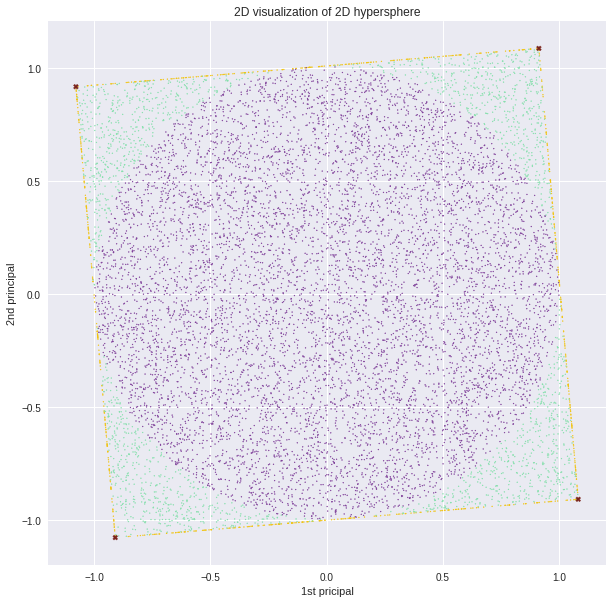

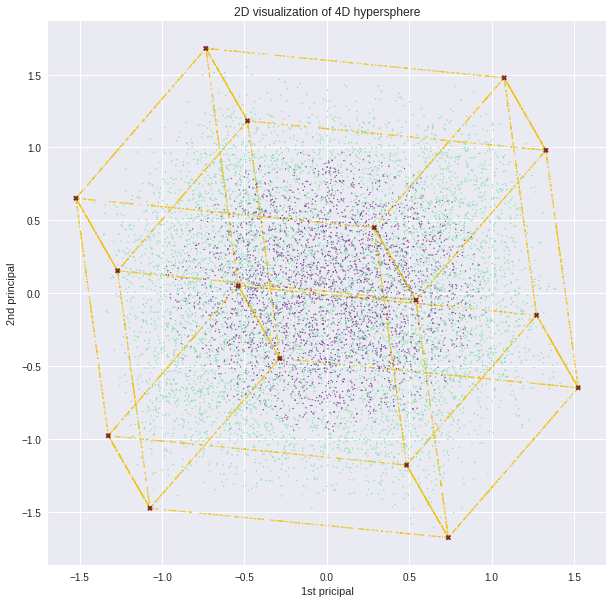

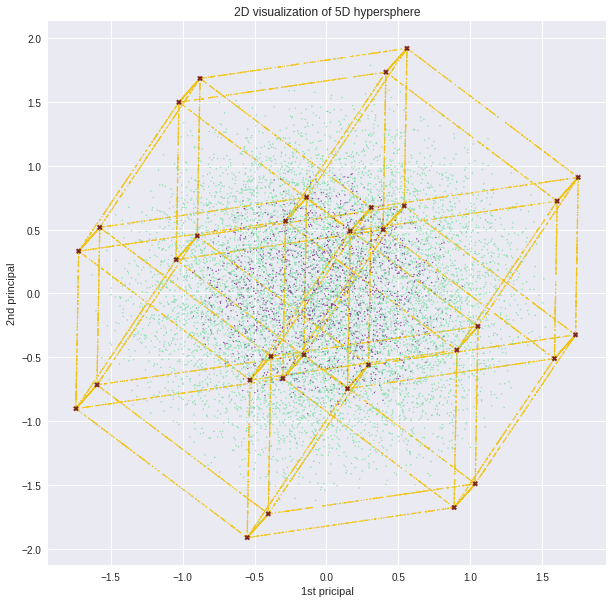

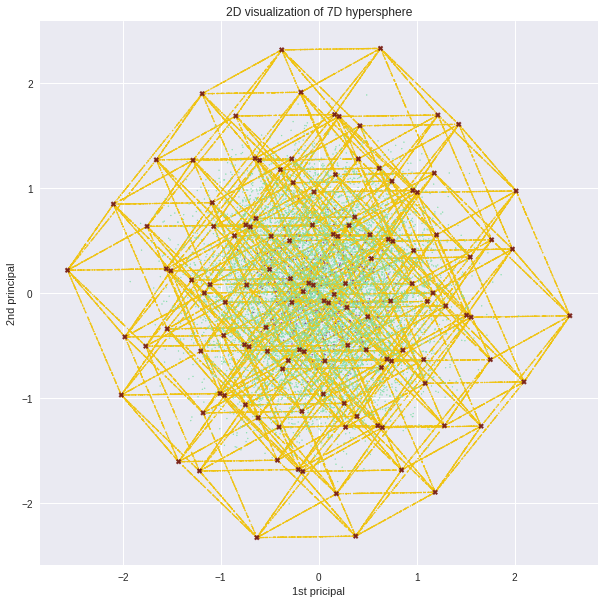

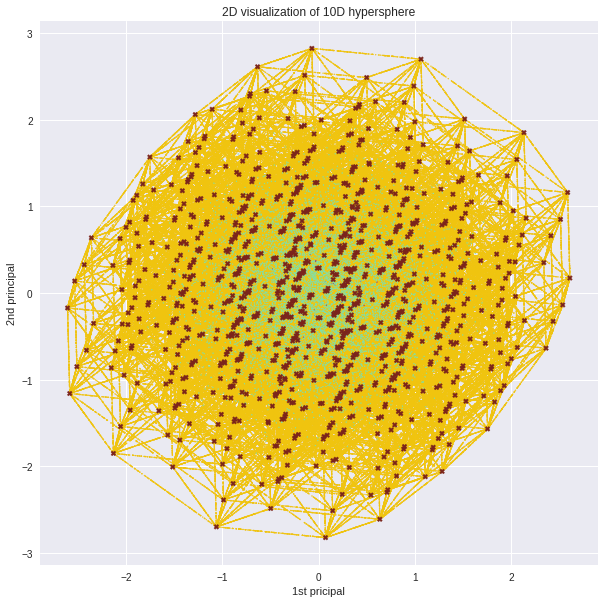

In [77]:
inside_points = 10000
edge_points = 100

for dim in [2, 4, 5, 7, 10]:
    hypercube = create_coloured_hypercube(dim, 1, inside_points, edge_points)
    X, y = hypercube[:,:-1], hypercube[:,-1]
    X = pca_transform(X, dimension=2)
    visualize_2D(X, y, dim, cmap, corner_size=25)

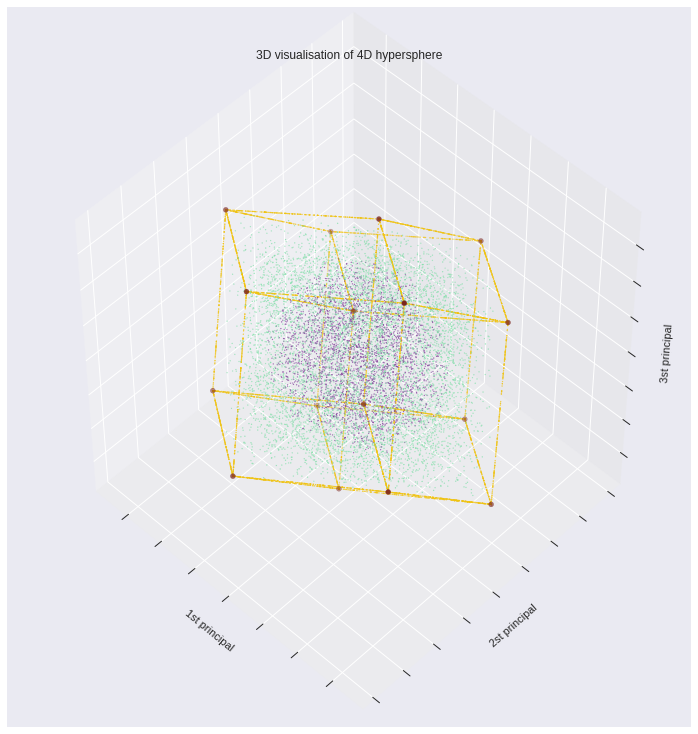

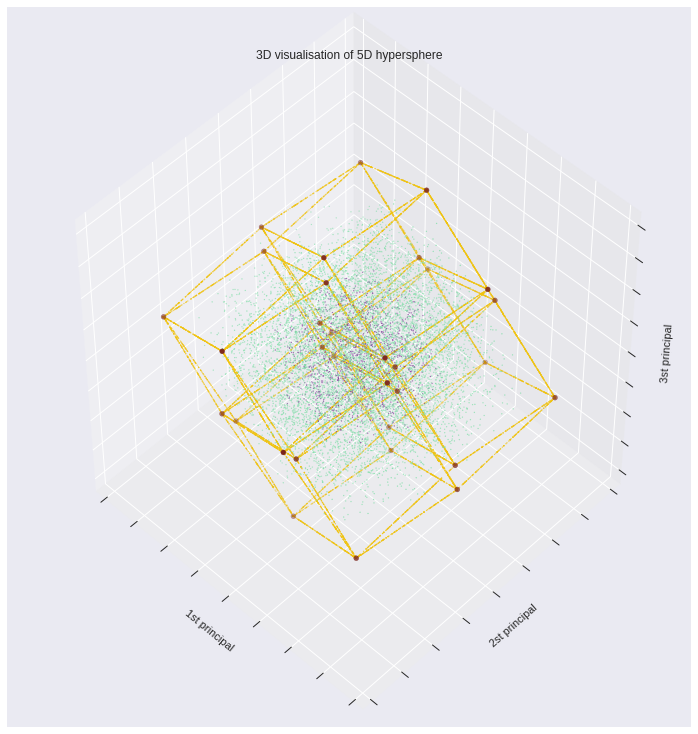

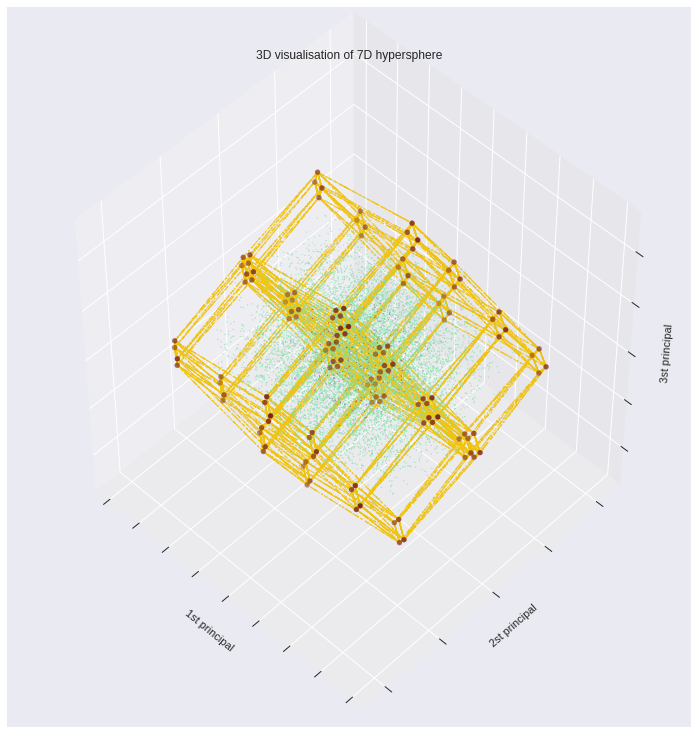

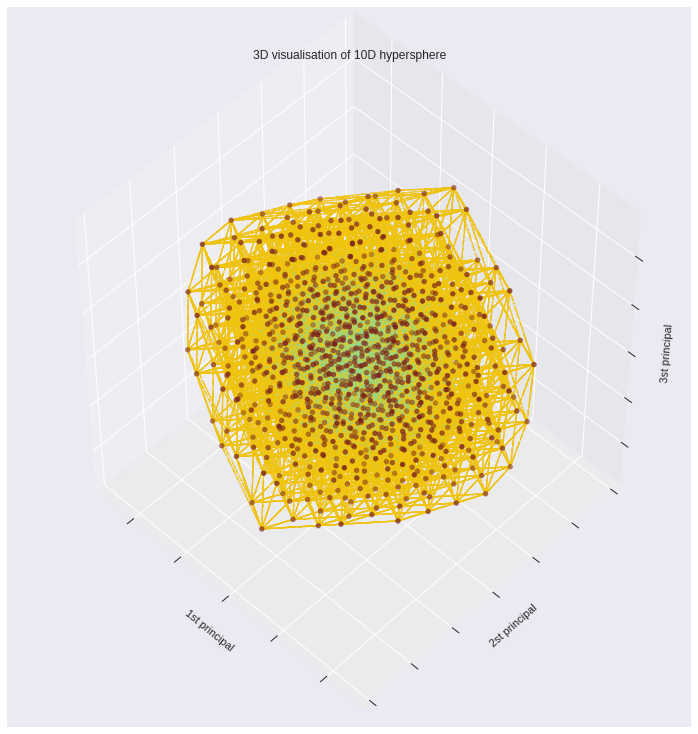

In [148]:
inside_points = 10000
edge_points = 100

for dim in [4, 5, 7, 10]:
    hypercube = create_coloured_hypercube(dim, 1, inside_points, edge_points)
    X, y = hypercube[:,:-1], hypercube[:,-1]
    X = pca_transform(X, 3)
    visualize_3D(X, y, dim, cmap, corner_size=25)

### Second assignment

Wygenerujmy zbiór danych wyglądający +- tak, jak na rysunku w załączniku (punkty w różnych kolorach należą do różnych klas). Potraktujmy go klasycznym PCA. Przygotujmy diagram prezentujący rozkład punktów w nowo znalezionej przestrzeni. Nanieśmy również na pierwotny rysunek strzałki prezentujące wektory będące znalezionymi "principal components" (gdzie długość wektora jest proporcjonalna do wariancji przez niego wyjaśnianej). Spoiler - efekty będą dość trywialne (mapowanie z 2D w inne 2D). Można próbować uzyskać więcej stosując tzw. kernel trick - zamiast klasycznego iloczynu skalarnego wykorzysztać inną, odpowiednio spreparowaną funkcję. Zrzutujmy więc oba zbiory w nową przestrzeń, ale tym razem wykorzystując kernel PCA z kernelami "cosine" (tu warto sprawdzić jaki wpływ na wynik będzie miało wcześniejsze wyśrodkowanie danych lub jego brak) i "rbf" (radial basis function - tu należy sprawdzić różne wartości parametru gamma wpływającego na pracę kernela, w tym także bardzo małe) oraz przygotujmy diagramy prezentujące efekty.

In [0]:
colors_dict = {
    '#ffffff': ('white', 0),
    '#ff0000': ('red', 1),
    '#ffbf00': ('orange', 2),
    '#ffff00': ('yellow', 3),
    '#00ff00': ('green', 4),
    '#00bfff': ('blue', 5),
    '#0000ff': ('dark blue', 6),
    '#551a8b': ('purple', 7),
    '#ffb6c1': ('pink', 8),
    '#000000': ('black', 9)
}

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in colors_dict.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name

In [0]:
def noise(point: float):
    return point + random.gauss(0, 1)

def write_data_to_csv(source_img: str, dest_path: str):
    """
    Save given image to csv-like format.
    Csv file contains 4 columns: x co-ordinate, y co-ordinate, color number, color name
    """
    image = Image.open(source_img)
    image = image.convert('RGB')
    width, height = image.size
    with open(dest_path, 'w') as dest_file:
        for x in range(0, width):
            for y in range(0, height):
                color, color_num = closest_colour(image.getpixel((x,y)))
                if color != 'white':
                    dest_file.write(f'{noise(x)};{noise(y)};{color_num};{color}\n')
                    
def load_datasets(dataset_path: str):
    dataset_df = pd.read_csv(dataset_path, sep=';', names=['x', 'y', 'color_name', 'color_num'])
    dataset_df = dataset_df.sample(frac=1)
    return dataset_df

In [0]:
data = ('PCA.png', )
output_paths = ('pca-dataset.csv', )

In [0]:
# Save all images(data) to file(csv)
for _in, _out in zip(data, output_paths):
    write_data_to_csv(_in, _out)

In [0]:
%matplotlib inline
def show_data(img_path):
    pil_im = Image.open(img_path, 'r')
    pil_im = pil_im.convert('RGB')
    plt.imshow(np.asarray(pil_im))

In [0]:
data = load_datasets(output_paths[0])

In [0]:
unique, counts = np.unique(data.iloc[:, 3], return_counts=True)
quantity = dict(zip(unique, [prob / data.shape[0] for prob in counts]))

In [64]:
quantity

{'blue': 0.13648393194706995,
 'green': 0.14820415879017013,
 'red': 0.3739130434782609,
 'yellow': 0.3413988657844991}

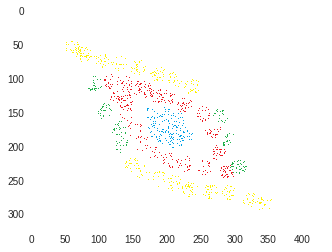

In [44]:
show_data(data[0])

Procentowy udzial kolorow

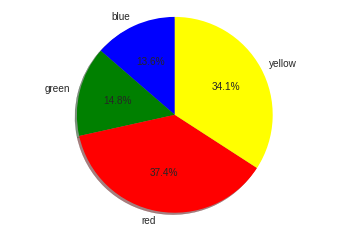

In [68]:
fig1, ax1 = plt.subplots()
ax1.pie(quantity.values(), colors=quantity.keys(), labels=quantity.keys(), 
        autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [0]:
X, y = data.iloc[:, 0:2], data.iloc[:, 2]

Text(0.5,1,'PCA transformation -> 2D to 2D')

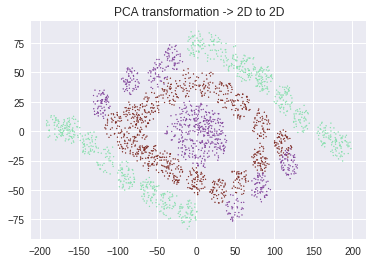

In [130]:
X_t = pca_transform(X, 2)

plt.scatter(X_t[:,0], X_t[:,1], c=y, cmap=cmap, s=1)
plt.title('PCA transformation -> 2D to 2D')

### Eigenvectors

Text(0.5,1,'Eigenvectors on original picture')

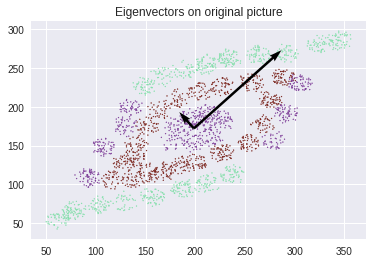

In [131]:
pca = PCA(n_components=2)
pca.fit(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap, s=1)
origin = [np.mean(X.iloc[:,0])], [np.mean(X.iloc[:,1])]
plt.quiver(*origin, pca.components_[0,0],pca.components_[0,1], scale =20000/pca.explained_variance_[0])
plt.quiver(*origin, pca.components_[1,0],pca.components_[1,1], scale =20000/pca.explained_variance_[1])
plt.title('Eigenvectors on original picture')

### Kernel Trick

In [0]:
def kernel_trick(X: np.ndarray, components:int, function: str, **kwargs):
    kernel_pca =  KernelPCA(n_components=components, kernel=function, **kwargs)
    kernel_pca.fit(X)
    return kernel_pca.transform(X)

Text(0.5,1,'Kernel PCA with cosine function')

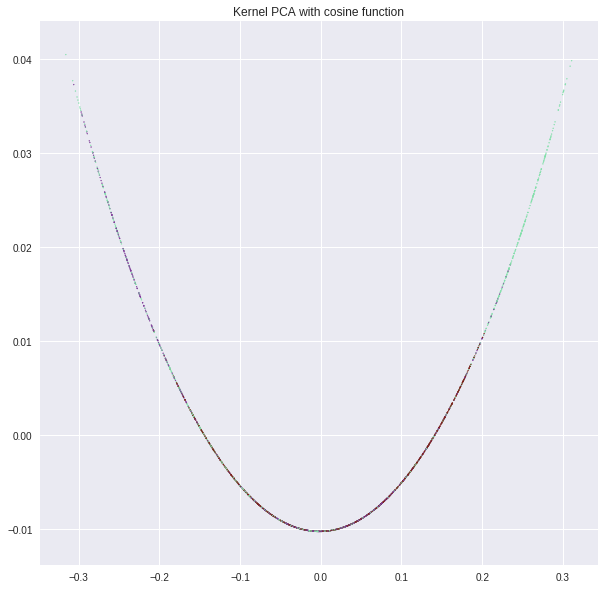

In [133]:
function = 'cosine'

X_t2 = kernel_trick(X, 2, function)

plt.figure(figsize=(10,10))
plt.scatter(X_t2[:,0],X_t2[:,1], c=y, cmap=cmap, s=1)
plt.title("Kernel PCA with {0} function".format(function))

Text(0.5,1,'Kernel PCA with cosine function')

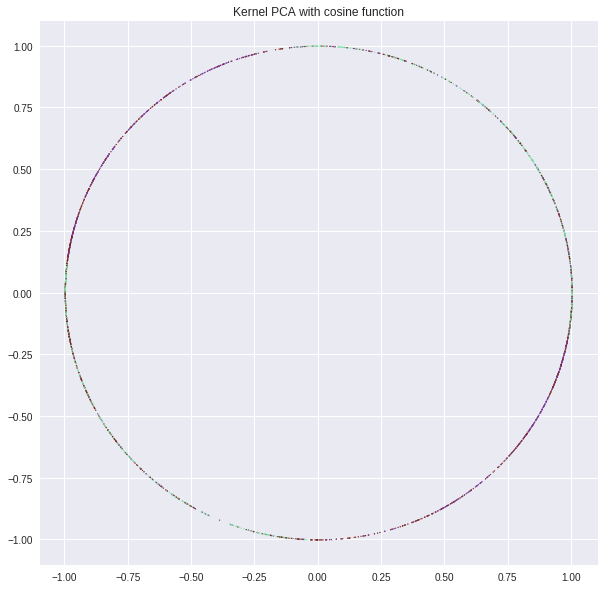

In [134]:
function = 'cosine'

X_t3 = kernel_trick(X_t, 2, function)

plt.figure(figsize=(10,10))
plt.scatter(X_t3[:,0],X_t3[:,1], c=y, cmap=cmap, s=1)
plt.title("Kernel PCA with {0} function".format(function))

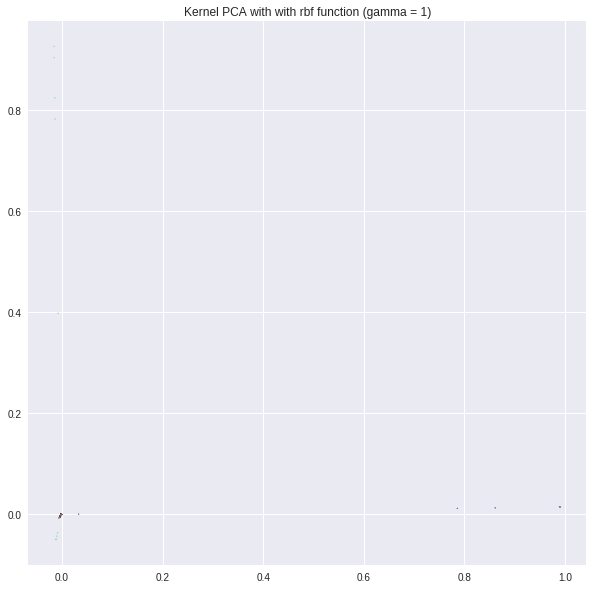

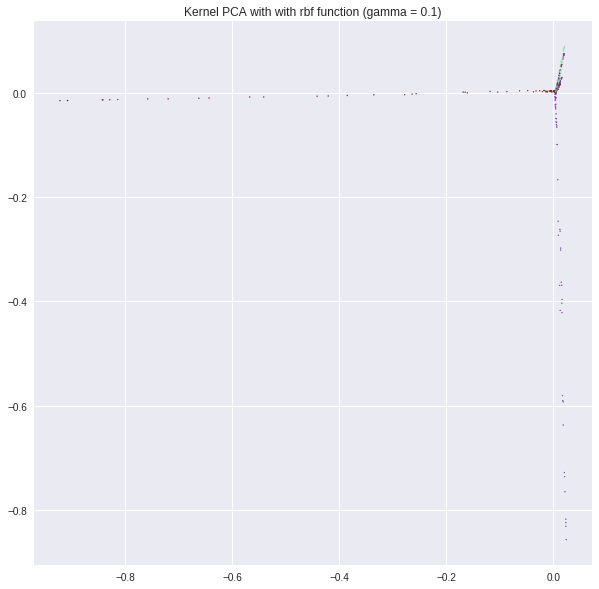

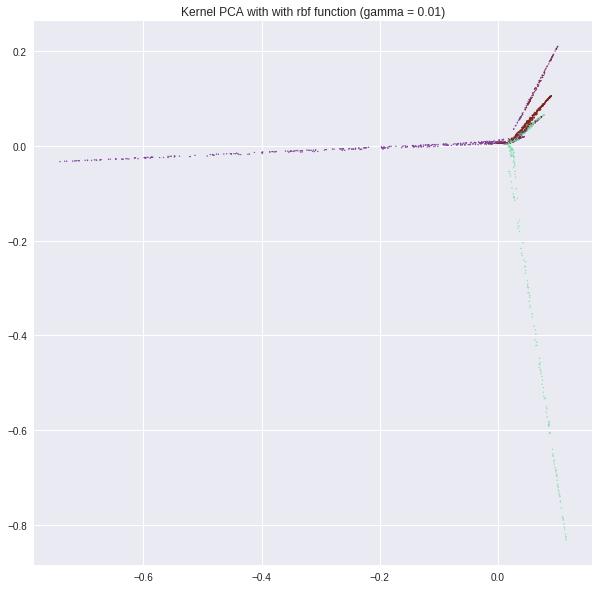

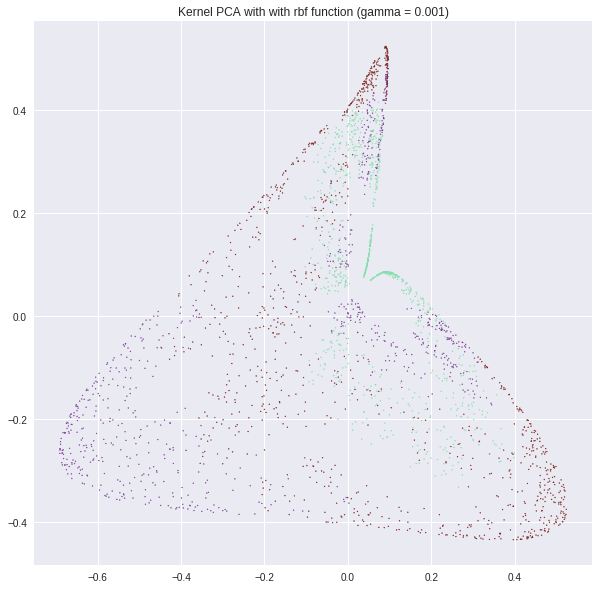

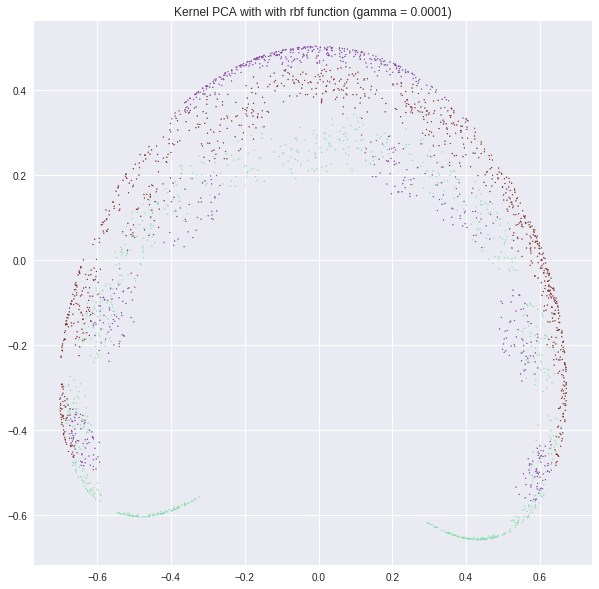

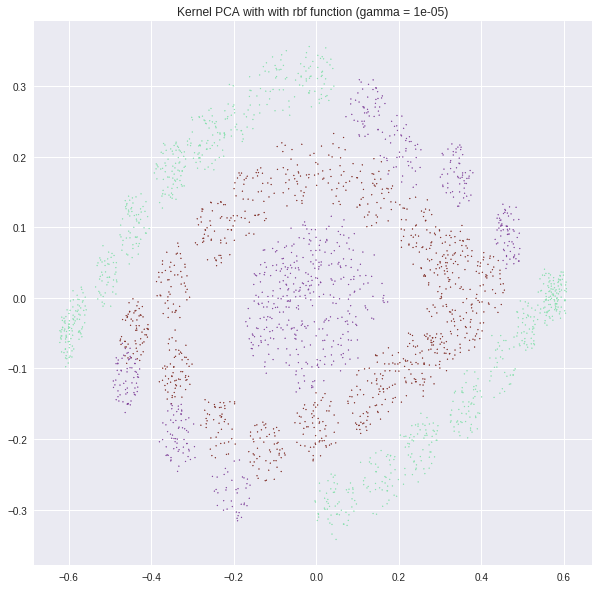

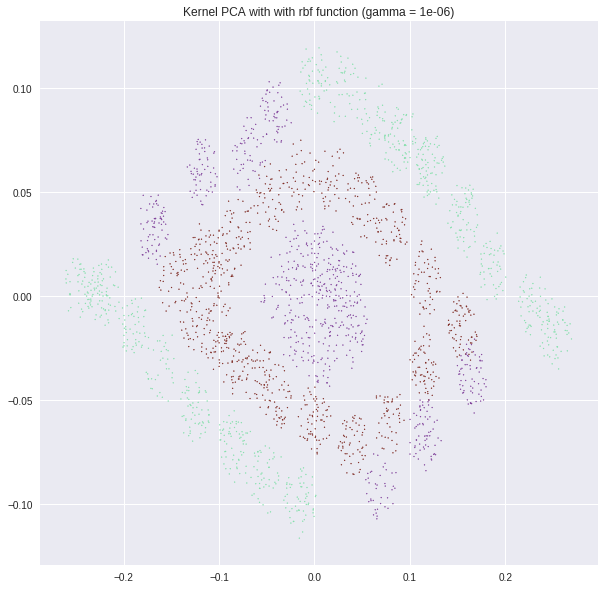

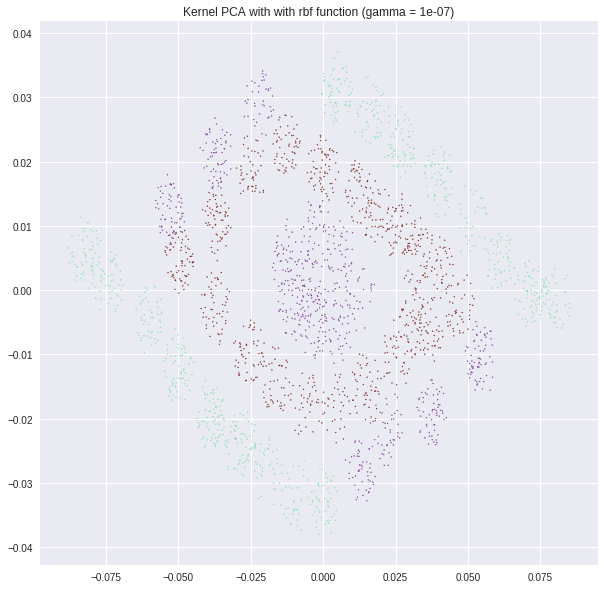

In [145]:
function = 'rbf'
gammas = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]


for gamma in gammas:
    X_trbf = kernel_trick(X, 2, function, gamma=gamma)
    plt.figure(figsize=(10,10))
    plt.scatter(X_trbf[:, 0], X_trbf[:, 1], c=y, cmap=cmap, s=1)
    plt.title('Kernel PCA with with {} function (gamma = {})'.format(function, gamma))
    plt.show()

### Wnioski
* Jak można zauwazyć na wykresach (jak i zadania z 1 cwiczen) ukazujacych rzut hiperszescianow na plazsczyzny 2 i 3 wymiarowe prawdopodobienstwa pojawienia sie punktow w srodku hiperkuli maleje znaczaca ze wzrostem wymiarow. 
* Wraz ze wzrostem wymiarow rzuty stawaly sie coraz bardziej nieczytalene. Rzut stawał sie praktycznie zbiorem samych krawedzi.
* Ograniczenie sie do 2/3 glownych skladowych pozwala nam na usuniecie mniej znaczacych skladowych, dzieki czemu pozbywamy sie cech ktore moglyby naruszyc poprawnosc dzialania naszego modelu, a takze dzieki zmniejszeniu ilosci wymiaru samo przetwarzanie byloby szybsze.

* Przy zastosowaniu PCA z 2D do 2D widzimy, ze baza zostala zmieniona. Obraz zostal skoncetrowany wokol punktu (0, 0)
* Przy użyciu PCA z kernel cosine mozna zauwazyc, iz rozstawienie punktow jest zalezne od kąta pod ktorym one leza od punktu (0, 0) w pierwotnym datasecie. PCA z kernel cosine dla datasetu skoncetrowanego w (0, 0) wyglada jak okrąg, przed wysrodkowaniem jak hiperbola.
* PCA z kernel RBF dla bardzo małych wartości gamma działa podobnie do PCA.
* PCA z kernel RBF dla współczynnika gamma = 1 dla tych danych na wykresie widać bardzo niewiele,
wraz z maleniem współczynnika widać separację kolorów. Czym wiekszy wspolczynnik tym slabsza separacja.